In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width: 98%!important }</style>'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

from svmutil import *

In [3]:
num = 400
X, true_y = make_moons(num, noise=0.1, random_state=42)
true_y = true_y.astype(np.float32)

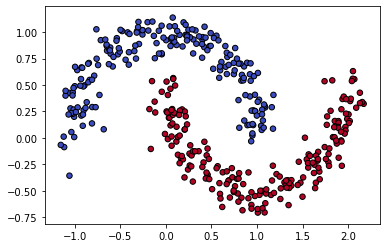

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=true_y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
plt.show()

In [5]:
def ignore_labels_random(y, ignore_ratio=0.8):
    # Separate all classes
    # Sample uniformly
    zero_idx = np.where(y == 0)[0]
    one_idx = np.where(y == 1)[0]
    
    y_ret = np.copy(y)
    ignore_index = zero_idx[np.random.choice(zero_idx.size, int(zero_idx.size * ignore_ratio), replace=False)]
    y_ret[ignore_index] = np.NaN
    
    ignore_index = one_idx[np.random.choice(one_idx.size, int(one_idx.size * ignore_ratio), replace=False)]
    y_ret[ignore_index] = np.NaN
    return y_ret

def ignore_labels_selective(true_y, X):
    x_red = (X[:, 0] > 0) & (X[:, 0] < 0.3)
    y_red = (X[:, 1] > -0.25) & (X[:, 1] < 0)
    
    x_blue = (X[:, 0] > 0.5) & (X[:, 0] < 0.8)
    y_blue = (X[:, 1] > 0.5) & (X[:, 1] < 0.75)
    
    y = np.copy(true_y)
    y[~((x_red & y_red) | (x_blue & y_blue))] = np.nan
    return y
     
y = ignore_labels_selective(true_y, X)
y

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan,  1., nan, nan, nan, nan, nan, nan,  1., nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1., nan, nan,
       nan, nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  1.,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,  0

In [6]:
prob = svm_problem(y, X)
param = svm_parameter('-q')
param.svm_type = LAPESVR
param.C = 10
param.lap_gamma = 0.5
param.n_neighbors = 30
param.nu_eigen = 400
param.lmbda = 1000000
param.mu = 1
param.lap_p = 1

m = svm_train(prob, param)
_, metrics, preds_values = svm_predict(true_y, X, m)

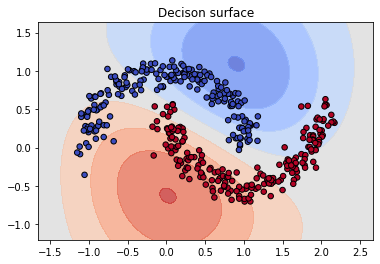

In [7]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, m, xx, yy, **params):
    _, _, Z = svm_predict([], np.c_[xx.ravel(), yy.ravel()], m)
    Z = np.array(Z).reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
xx, yy = make_meshgrid(X[:, 0], X[:, 1])

plot_contours(ax, m, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[:, 0], X[:, 1], c=true_y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
ax.set_title('Decison surface')
plt.show()

In [8]:
prob = svm_problem(y, X)
param = svm_parameter('-q')
param.svm_type = LAPESVR
param.C = 10
param.lap_gamma = 0.5
param.n_neighbors = 30
param.nu_eigen = 400
param.lmbda = 1000000
param.mu = 1000
param.lap_p = 1

m = svm_train(prob, param)
_, metrics, preds_values = svm_predict(true_y, X, m)

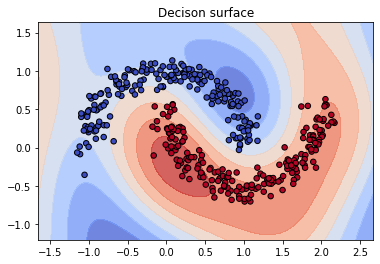

In [9]:
fig, ax = plt.subplots()
xx, yy = make_meshgrid(X[:, 0], X[:, 1])

plot_contours(ax, m, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[:, 0], X[:, 1], c=true_y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
ax.set_title('Decison surface')
plt.show()

In [10]:
prob = svm_problem(y, X)
param = svm_parameter('-q')
param.svm_type = LAPESVR
param.C = 10
param.lap_gamma = 0.5
param.n_neighbors = 30
param.nu_eigen = 400
param.lmbda = 1000000
param.mu = 1000000
param.lap_p = 1

m = svm_train(prob, param)
_, metrics, preds_values = svm_predict(true_y, X, m)

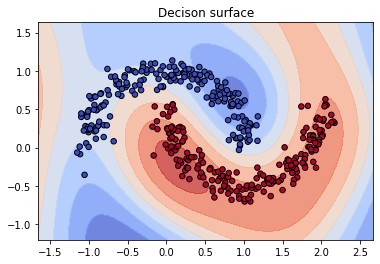

In [11]:
fig, ax = plt.subplots()
xx, yy = make_meshgrid(X[:, 0], X[:, 1])

plot_contours(ax, m, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[:, 0], X[:, 1], c=true_y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
ax.set_title('Decison surface')
plt.show()